In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import rotate
from skimage.feature import local_binary_pattern
from skimage import io
from skimage import data
from skimage.color import rgb2gray
from skimage.color import label2rgb

METHOD = 'uniform'
plt.rcParams['font.size'] = 9

# settings for LBP
radius = 3
n_points = 8 * radius

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility
  return f(*args, **kwds)


Matched against references using LBP:
original: A0008_1.jpg, match result: break


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


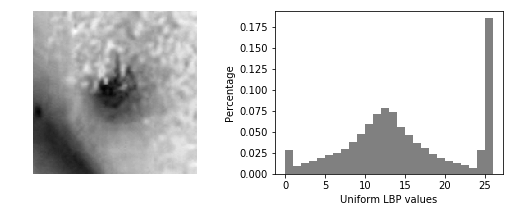

original: A0013_2.jpg, match result: white


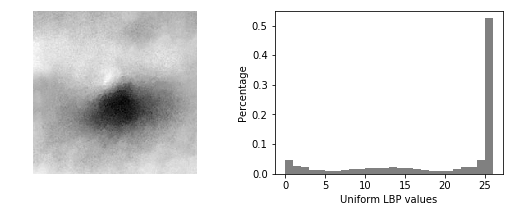

original: A0011_3.jpg, match result: white


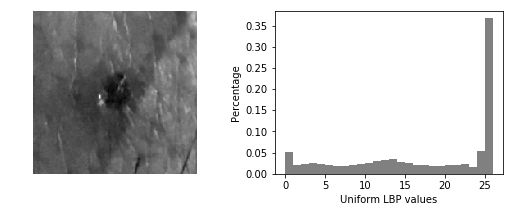

original: A0015_2.jpg, match result: white


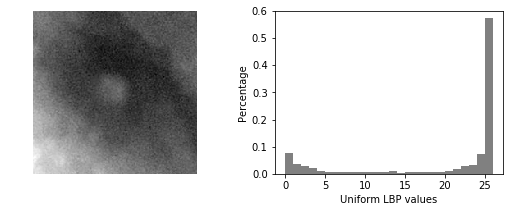

original: A0017_1.jpg, match result: white


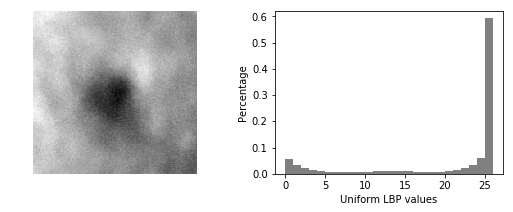

original: A0009_3.jpg, match result: white


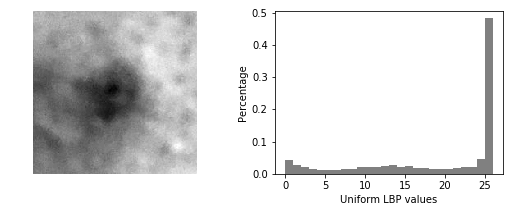

original: A0010_2.jpg, match result: white


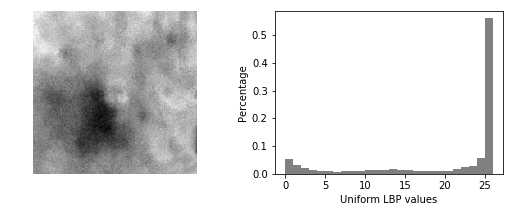

original: A0012_3.jpg, match result: red


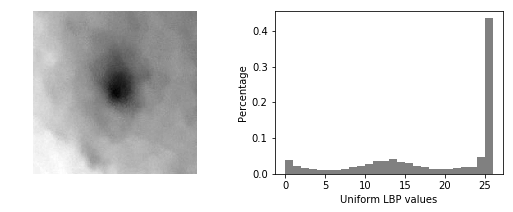

original: A0016_2.jpg, match result: break


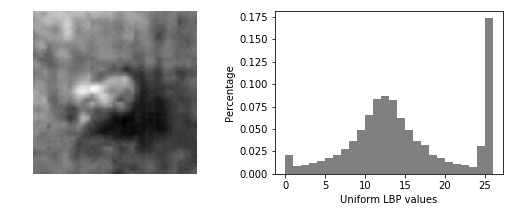

original: A0014_2.jpg, match result: white


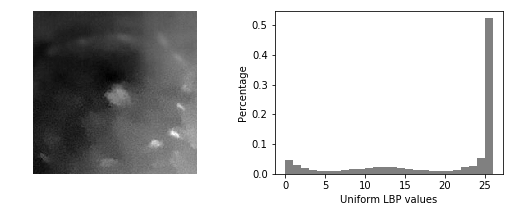

original: A0018_2.jpg, match result: red


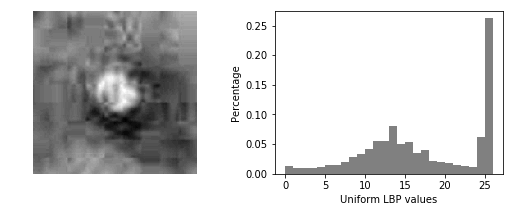

original: A0003_1.jpg, match result: red


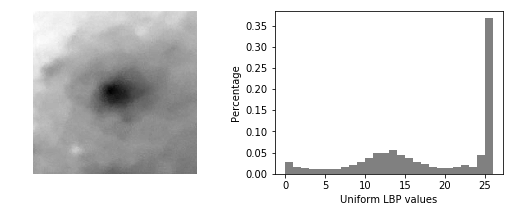

original: A0001_3.jpg, match result: break


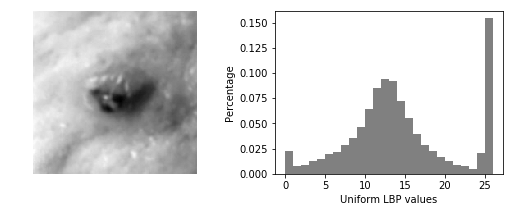

original: A0007_2.jpg, match result: white


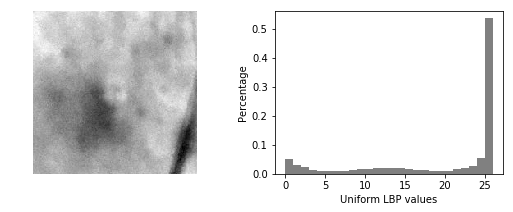

original: A0023_2.jpg, match result: white


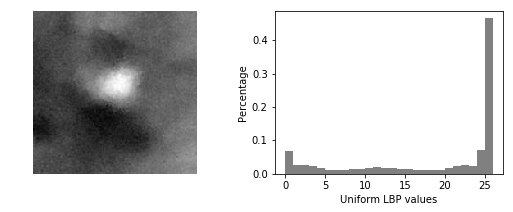

original: A0021_2.jpg, match result: white


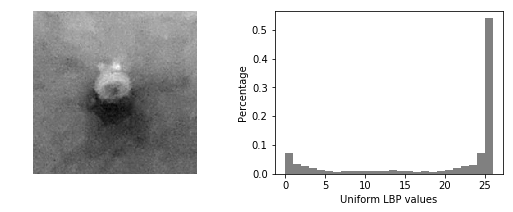

original: A0005_2.jpg, match result: white


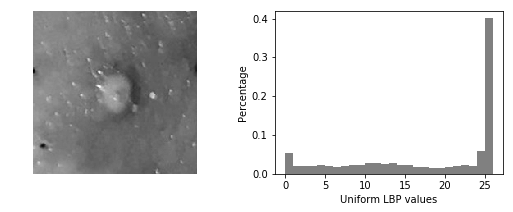

original: A0002_2.jpg, match result: white


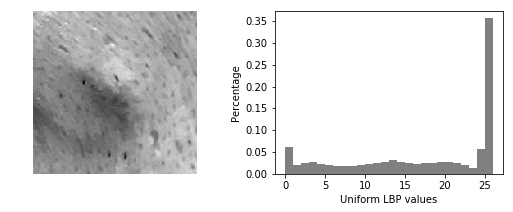

original: A0019_2.jpg, match result: white


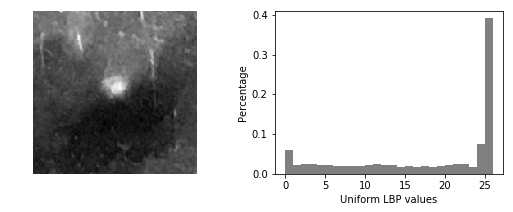

original: A0004_2.jpg, match result: white


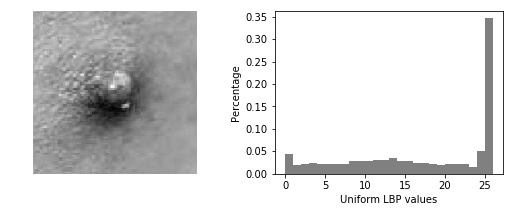

original: A0020_3.jpg, match result: white


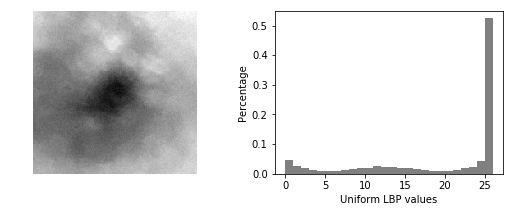

original: A0006_2.jpg, match result: white


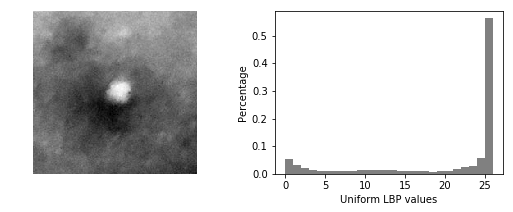

original: A0022_2.jpg, match result: white


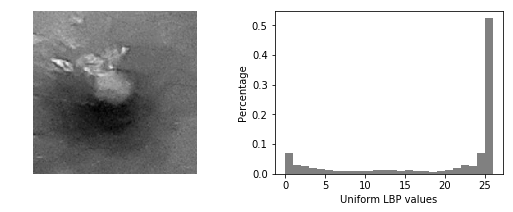

correct count: 15/23
white correct count: 17/23


"\nfig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(nrows=2, ncols=5,\n                                                       figsize=(15, 6))\nplt.gray()\n\nax1.imshow(white1)\nax1.axis('off')\nhist(ax6, local_binary_pattern(white1, n_points, radius, METHOD))\nax6.set_ylabel('Percentage')\n\nax2.imshow(white2)\nax2.axis('off')\nhist(ax7, local_binary_pattern(white2, n_points, radius, METHOD))\n\nax3.imshow(white3)\nax3.axis('off')\nhist(ax8, local_binary_pattern(white3, n_points, radius, METHOD))\nax8.set_xlabel('Uniform LBP values')\n\nax4.imshow(red1)\nax4.axis('off')\nhist(ax9, local_binary_pattern(red1, n_points, radius, METHOD))\n\nax5.imshow(break1)\nax5.axis('off')\nhist(ax10, local_binary_pattern(break1, n_points, radius, METHOD))\n\nplt.show()\n"

In [2]:
def hist(ax, lbp):
    n_bins = int(lbp.max() + 1)
    return ax.hist(lbp.ravel(), normed=True, bins=n_bins, range=(0, n_bins),
                   facecolor='0.5')

def kullback_leibler_divergence(p, q):
    p = np.asarray(p)
    q = np.asarray(q)
    filt = np.logical_and(p != 0, q != 0)
    return np.sum(p[filt] * np.log2(p[filt] / q[filt]))


def match(refs, img):
    best_score = 10
    best_name = None
    lbp = local_binary_pattern(img, n_points, radius, METHOD)
    n_bins = int(lbp.max() + 1)
    hist, _ = np.histogram(lbp, density=True, bins=n_bins, range=(0, n_bins))
    for name, ref in refs.items():
        ref_hist, _ = np.histogram(ref, density=True, bins=n_bins,
                                   range=(0, n_bins))
        score = kullback_leibler_divergence(hist, ref_hist)
        if score < best_score:
            best_score = score
            best_name = name
    return best_name

my_path = '../Data/labelled/'
#brick = data.load('brick.png')
#grass = data.load('grass.png')
#wall = data.load('rough-wall.png')
white1 = rgb2gray(io.imread(my_path + 'A0002_2.jpg'))
#white2 = rgb2gray(io.imread(my_path + 'white2.jpg'))
#white3 = rgb2gray(io.imread(my_path + 'white3.jpg'))
break1 = rgb2gray(io.imread(my_path + 'A0001_3.jpg'))
red1 = rgb2gray(io.imread(my_path + 'A0003_1.jpg'))

refs = {
    'red': local_binary_pattern(red1, n_points, radius, METHOD),
    'white': local_binary_pattern(white1, n_points, radius, METHOD),
    'break': local_binary_pattern(break1, n_points, radius, METHOD)
}

from os import listdir
from os.path import isfile, join

images = [f for f in listdir(my_path) \
          if isfile(join(my_path, f)) \
          and f.lower().endswith(('.jpg','.jpeg','.png'))]
# classify rotated textures
print('Matched against references using LBP:')

white_correct_count = 0
correct_count = 0
count = 0
for img in images:
    if '_' in img:
        count += 1
        img_gray = rgb2gray(io.imread(my_path + img))
        match_name = match(refs, rotate(img_gray, angle=0, resize=False))
        print('original: ' + str(img) + ', match result: ' + match_name)
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 3))
        plt.gray()
        
        ax1.imshow(img_gray)
        ax1.axis('off')
        hist(ax2, local_binary_pattern(img_gray, n_points, radius, METHOD))
        ax2.set_ylabel('Percentage')
        ax2.set_xlabel('Uniform LBP values')
        
        plt.show()
        plt.close()
        if match_name == 'red':
            if img.split('.')[0].split('_')[1] == "1":
                correct_count += 1
                white_correct_count += 1
            if img.split('.')[0].split('_')[1] == "3":
                white_correct_count += 1
        elif match_name == 'white':
            if img.split('.')[0].split('_')[1] == "2":
                correct_count += 1
                white_correct_count += 1
        elif match_name == 'break':
            if img.split('.')[0].split('_')[1] == "3":
                correct_count += 1
                white_correct_count += 1
            if img.split('.')[0].split('_')[1] == "1":
                white_correct_count += 1

print('correct count: ' + str(correct_count) + '/' + str(count))
print('white correct count: ' + str(white_correct_count) + '/' + str(count))

# plot histograms of LBP of textures
'''
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(nrows=2, ncols=5,
                                                       figsize=(15, 6))
plt.gray()

ax1.imshow(white1)
ax1.axis('off')
hist(ax6, local_binary_pattern(white1, n_points, radius, METHOD))
ax6.set_ylabel('Percentage')

ax2.imshow(white2)
ax2.axis('off')
hist(ax7, local_binary_pattern(white2, n_points, radius, METHOD))

ax3.imshow(white3)
ax3.axis('off')
hist(ax8, local_binary_pattern(white3, n_points, radius, METHOD))
ax8.set_xlabel('Uniform LBP values')

ax4.imshow(red1)
ax4.axis('off')
hist(ax9, local_binary_pattern(red1, n_points, radius, METHOD))

ax5.imshow(break1)
ax5.axis('off')
hist(ax10, local_binary_pattern(break1, n_points, radius, METHOD))

plt.show()
'''